In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from google.colab import drive # performed on google colab
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#load csv file
df=pd.read_csv('/content/drive/MyDrive/machine learning/cartrade.csv')

In [5]:
df.head()

,Brand,Model,km_driven,Owner,Mfg_year,Fuel_type,Mileage,Transmission,Price(lakh)
0,Hyundai,Creta,"28,662",First,2020,Petrol,15.29,Automatic,14.90
1,Skoda,Superb,"34,463",Second,2017,Petrol,14.81,Automatic,15.95
2,BMW,X1,"64,300",Second,2016,Diesel,FWD,BS,18.75
3,Mercedes-Benz,C-Class,"57,750",First,2015,Petrol,14.74,Automatic,23.85
4,Hyundai,Creta,"71,000",First,2019,Diesel,17.01,Automatic,15.49


Step 1 : Handeling null vales

In [6]:
# checking for null values
df.isnull().sum()

Brand           0
Model           0
km_driven       0
Owner           0
Mfg_year        0
Fuel_type       0
Mileage         0
Transmission    0
Price(lakh)     0
dtype: int64

  Step 2: Handeling duplicate values

In [7]:
#checking for duplicated value
df.duplicated().sum()

229

In [8]:
#drop duplicate values
df.drop_duplicates()

,Brand,Model,km_driven,Owner,Mfg_year,Fuel_type,Mileage,Transmission,Price(lakh)
0,Hyundai,Creta,"28,662",First,2020,Petrol,15.29,Automatic,14.90
1,Skoda,Superb,"34,463",Second,2017,Petrol,14.81,Automatic,15.95
2,BMW,X1,"64,300",Second,2016,Diesel,FWD,BS,18.75
3,Mercedes-Benz,C-Class,"57,750",First,2015,Petrol,14.74,Automatic,23.85
4,Hyundai,Creta,"71,000",First,2019,Diesel,17.01,Automatic,15.49
...,...,...,...,...,...,...,...,...,...
1005,Hyundai,Elite,"60,902",Second,2017,Petrol,FWD,No,6.90
1006,Maruti,Suzuki,"45,169",First,2019,Petrol,22.74,Manual,3.69
1007,Maruti,Suzuki,"43,149",First,2013,Petrol,15,3539,2.83
1008,Maruti,Suzuki,"18,099",Second,2018,Petrol,23.1,AMT,4.83


Step 3: Varifying datatypes

In [9]:
#checking data types of all column
df.dtypes

Brand            object
Model            object
km_driven        object
Owner            object
Mfg_year          int64
Fuel_type        object
Mileage          object
Transmission     object
Price(lakh)     float64
dtype: object

In [10]:
# columns like km_driven,mileage should be integer type but they are object type in this dataset
#we need to check why this columns are object type

In [11]:
df['km_driven']=[float(str(i).replace(",", "")) for i in df["km_driven"]]

In [12]:
df['km_driven'].dtype

dtype('float64')

In [13]:
df['Mileage'].unique()

array(['15.29', '14.81', 'FWD', '14.74', '17.01', '18.7', '23.1', '22.15',
       '18.12', '17.4', '350', 'Manual', '16.8', '19.4', '17', '21.4',
       '20.4', '19.16', '20', '15.1', '14.29', '20.5', '24.29', '22.69',
       '11.4', '15.23', '15.96', '15.5', '19.1', '16.7', '18.6', '19.01',
       '22', '58', '15.04', '18.15', '17.5', '18.5', '17.97', '16',
       '22.5', '20.729999542236328', '19.12', '28.09', '24.2', '17.88',
       '19.77', '19.8', '18.9', '17.19', '16.2', '16.47', '20.73',
       '16.95', '23', '18.19', '12.9', '19', '19.3', '13.1', '16.96',
       '10.91', '2791', '14.7', '16.3', '17.2', '15.56', 'Automatic',
       '12.06', '13.9', '13.85', '4WD', '15.77', '14.6', 'AWD', '20.45',
       '15.97', '17.57', '22.74', 'RWD', '14.69', '335', '16.65', '241',
       '8.2', '18.48', '14.2', '11.33', '23.65', '20.63', '10.37',
       '14.59', '22.54', '194', '188', '16.5', '21.38', '17.99', '18.88',
       '14.75', '20.52', '15.6', '17.1', '17.41', '13.7', '16.55',
      

In [14]:
#column contains string 
#need to remove those strings
#Replace string with null values

In [15]:
df['Mileage'].replace('FWD',np.nan,inplace=True)

In [16]:
df['Mileage'].replace('Manual',np.nan,inplace=True)

In [17]:
df['Mileage'].replace('Automatic',np.nan,inplace=True)

In [18]:
df['Mileage'].replace('4WD',np.nan,inplace=True)

In [19]:
df['Mileage'].replace('RWD',np.nan,inplace=True)

In [20]:
df['Mileage'].replace('AWD',np.nan,inplace=True)

In [21]:
df['Mileage']=df['Mileage'].astype('float')

In [22]:

#fill nul value with mean of that column
m=df['Mileage'].mean()
m

43.98152541835741

In [23]:
df['Mileage'].fillna(m,inplace=True)

In [24]:
#cross chack
df.isnull().sum()

Brand           0
Model           0
km_driven       0
Owner           0
Mfg_year        0
Fuel_type       0
Mileage         0
Transmission    0
Price(lakh)     0
dtype: int64

In [25]:
df.dtypes

Brand            object
Model            object
km_driven       float64
Owner            object
Mfg_year          int64
Fuel_type        object
Mileage         float64
Transmission     object
Price(lakh)     float64
dtype: object

In [26]:
df['Transmission'].unique()

array(['Automatic', 'BS', 'Manual', '704', '1475', 'No', 'FWD',
       'Turbocharged', '4555', 'AMT', '1826', '3821', '807', 'Idle',
       '9.8', '1799', '14', 'AWD', '4879', '12.8', '15.3', '4886', '905',
       '4370', '10.6', '4WD', '4797', '5295', '20.3', 'Yes', 'RWD', '585',
       '22', '18.64', '17.6', '4431', '4838', '13.3', '1152', '3539',
       '791', '3775', '861', '1920', '4386'], dtype=object)

In [27]:
#Transmission column contain items that are not type of transmission
#need to remove those values

In [28]:
x=df[df['Transmission'] != 'Automatic']

In [29]:
y=x[x['Transmission']!='Manual'].index
y

Int64Index([   2,   12,   13,   14,   17,   18,   20,   21,   22,   23,
            ...
             981,  984,  986,  989,  992,  999, 1004, 1005, 1007, 1008],
           dtype='int64', length=411)

In [30]:
#drop unwanted values from column
df['Transmission']=df['Transmission'].drop(y)

In [31]:
df['Transmission'].unique()

array(['Automatic', nan, 'Manual'], dtype=object)

In [32]:
m=df['Transmission'].mode()
m

0    Automatic
dtype: object

In [33]:

#fill null values with mode of that column
df['Transmission'].fillna('Automatic',inplace=True)

In [34]:
df['Transmission'].isnull().sum()

0

In [35]:
# checking for duplicated values
df.duplicated().sum()

229

In [36]:
# drop duplicated values
df.drop_duplicates()

,Brand,Model,km_driven,Owner,Mfg_year,Fuel_type,Mileage,Transmission,Price(lakh)
0,Hyundai,Creta,28662.0,First,2020,Petrol,15.290000,Automatic,14.90
1,Skoda,Superb,34463.0,Second,2017,Petrol,14.810000,Automatic,15.95
2,BMW,X1,64300.0,Second,2016,Diesel,43.981525,Automatic,18.75
3,Mercedes-Benz,C-Class,57750.0,First,2015,Petrol,14.740000,Automatic,23.85
4,Hyundai,Creta,71000.0,First,2019,Diesel,17.010000,Automatic,15.49
...,...,...,...,...,...,...,...,...,...
1005,Hyundai,Elite,60902.0,Second,2017,Petrol,43.981525,Automatic,6.90
1006,Maruti,Suzuki,45169.0,First,2019,Petrol,22.740000,Manual,3.69
1007,Maruti,Suzuki,43149.0,First,2013,Petrol,15.000000,Automatic,2.83
1008,Maruti,Suzuki,18099.0,Second,2018,Petrol,23.100000,Automatic,4.83


3)Removing outliears

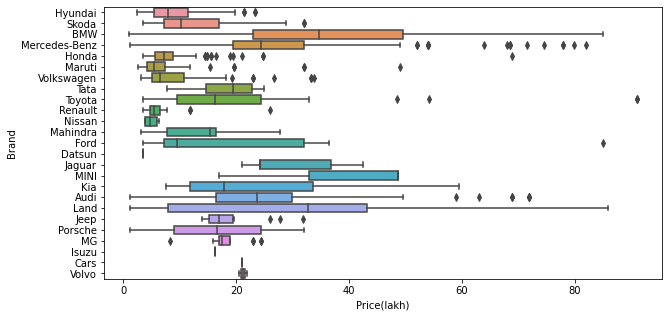

In [37]:
# to check outkier in price column with input 'Btand'col
plt.figure(figsize=(10,5))
sb.boxplot(data=df,x='Price(lakh)',y='Brand')
plt.show()

In [38]:
#here we see many outlier in each brand
#we need to remove outlier one by one

In [39]:
# to shoe thpose records whose make= isuzu and price>200000
l=df[(df['Brand']=='Hyundai')&(df['Price(lakh)']>20)].index
df.drop(l,inplace=True)

In [40]:
l=df[(df['Brand']=='Skoda')&(df['Price(lakh)']>25)].index
df.drop(l,inplace=True)

In [41]:
l=df[(df['Brand']=='Mercedes-Benz')&(df['Price(lakh)']>40)].index
df.drop(l,inplace=True)

In [42]:
l=df[(df['Brand']=='Mercedes-Benz')&(df['Price(lakh)']<13)].index
df.drop(l,inplace=True)

In [43]:
l=df[(df['Brand']=='Honda')&(df['Price(lakh)']>13)].index
df.drop(l,inplace=True)

In [44]:
l=df[(df['Brand']=='Maruti')&(df['Price(lakh)']>10)].index
df.drop(l,inplace=True)

In [45]:
l=df[(df['Brand']=='Volkswagen')&(df['Price(lakh)']>9)].index
df.drop(l,inplace=True)

In [46]:
l=df[(df['Brand']=='Toyota')&(df['Price(lakh)']>35)].index
df.drop(l,inplace=True)

In [47]:
l=df[(df['Brand']=='Renault')&(df['Price(lakh)']>10)].index
df.drop(l,inplace=True)

In [48]:
l=df[(df['Brand']=='Ford')&(df['Price(lakh)']>38)].index
df.drop(l,inplace=True)

In [49]:
l=df[(df['Brand']=='Audi')&(df['Price(lakh)']>45)].index
df.drop(l,inplace=True)

In [50]:
l=df[(df['Brand']=='Jeep')&(df['Price(lakh)']>20)].index
df.drop(l,inplace=True)

In [51]:
l=df[(df['Brand']=='MG')&(df['Price(lakh)']<15)].index
df.drop(l,inplace=True)

In [52]:
l=df[(df['Brand']=='MG')&(df['Price(lakh)']>15)].index
df.drop(l,inplace=True)

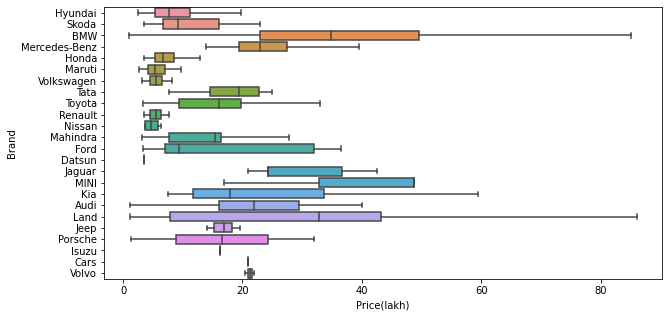

In [53]:

plt.figure(figsize=(10,5))
sb.boxplot(data=df,x='Price(lakh)',y='Brand')
plt.show()

In [54]:
df.dtypes

Brand            object
Model            object
km_driven       float64
Owner            object
Mfg_year          int64
Fuel_type        object
Mileage         float64
Transmission     object
Price(lakh)     float64
dtype: object

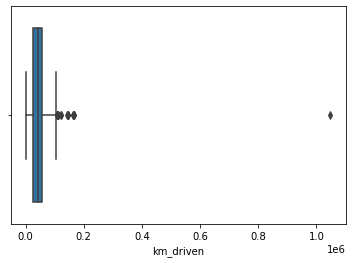

In [55]:
sb.boxplot(data=df,x='km_driven')

In [56]:
l=df[df['km_driven']>20000].index
df.drop(l,inplace=True)

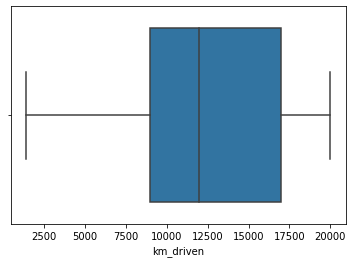

In [57]:
sb.boxplot(data=df,x='km_driven')

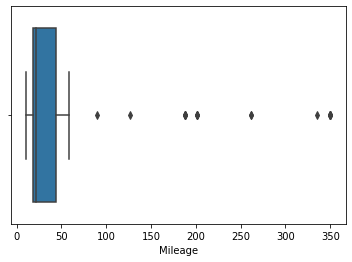

In [58]:
sb.boxplot(data=df,x='Mileage')

In [59]:
l=df[df['Mileage']>25].index
df.drop(l,inplace=True)

In [60]:
l=df[df['Mileage']<12].index
df.drop(l,inplace=True)

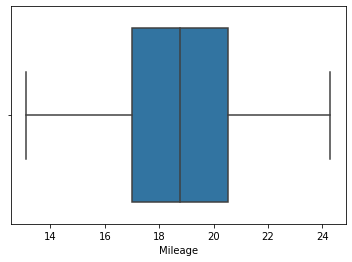

In [61]:
sb.boxplot(data=df,x='Mileage')

Finding insights and visualisation

1)Brands with high price

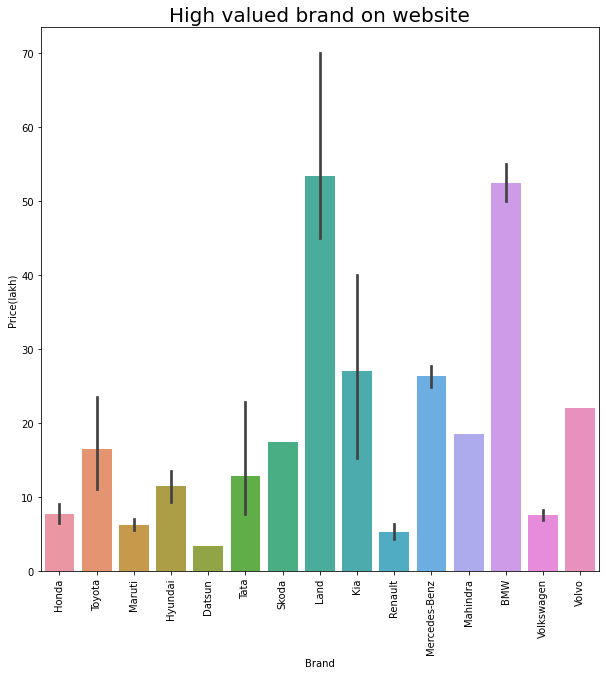

In [62]:
#  high value brand
plt.figure(figsize=(10,10))
sb.barplot(data=df,x='Brand',y='Price(lakh)')
plt.title('High valued brand on website',fontsize=20)
plt.xticks(rotation=90)
plt.show()

2) Types of fuel system 

In [63]:
l=df['Fuel_type'].unique()
print(l) 

['Petrol' 'Diesel']


In [64]:
c=df['Fuel_type'].value_counts()
print(c)


Petrol    82
Diesel    14
Name: Fuel_type, dtype: int64


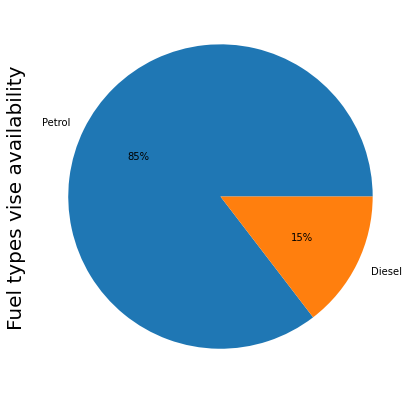

In [65]:
fig = plt.figure(figsize =(7,7))
plt.pie(c[0:4],labels=l[0:4],autopct='%.0f%%')
plt.ylabel('Fuel types vise availability',fontsize=20)
plt.show()

3) Most preferredtransmission type

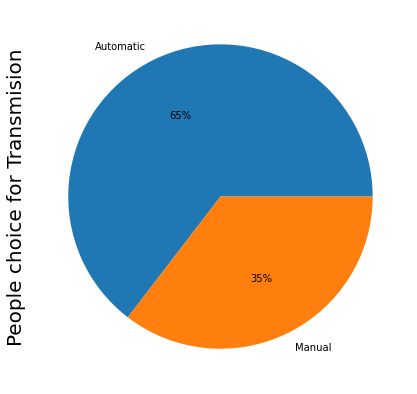

In [66]:
fig = plt.figure(figsize =(7,7))
df.groupby('Transmission').size().plot(kind='pie',autopct='%.0f%%')
plt.ylabel('People choice for Transmision',fontsize=20)
plt.show()

4) Relation between km_driven & Price

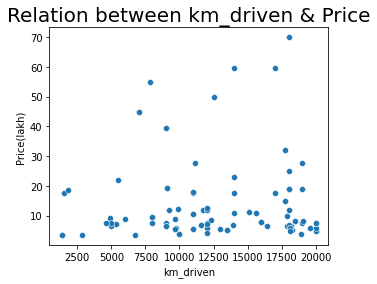

In [67]:
fig = plt.figure(figsize =(5,4))
sb.scatterplot(data=df,x=df['km_driven'],y=df['Price(lakh)'])
plt.title('Relation between km_driven & Price',fontsize=20)
plt.show()

5)Relation between mileage & Price

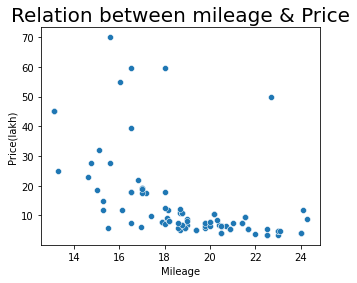

In [68]:
fig = plt.figure(figsize =(5,4))
sb.scatterplot(data=df,x=df['Mileage'],y=df['Price(lakh)'])
plt.title('Relation between mileage & Price',fontsize=20)
plt.show()

6)Brands with good mileage

In [69]:
l=df[df['Mileage']>40].index
df.drop(l,inplace=True)

In [70]:
mileage=[]
for item in df['Brand'].unique():
  val=df[df['Brand']==item].Mileage.nlargest(1).index[0]
  mileage.append(val)


In [71]:
data=df.loc[mileage]

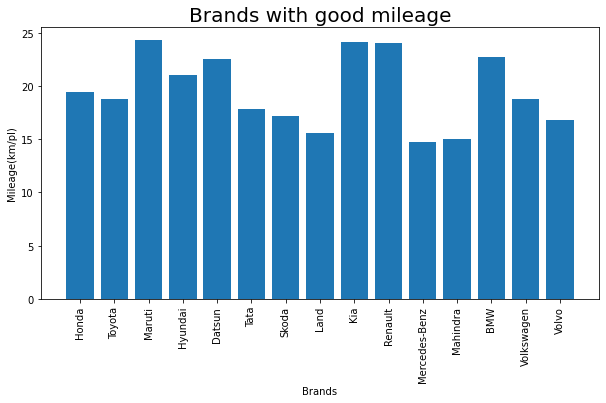

In [72]:
fig = plt.figure(figsize =(10,5))
plt.bar(data.Brand,data.Mileage)
plt.title('Brands with good mileage',fontsize=20)
plt.ylabel('Mileage(km/pl)')
plt.xlabel('Brands')
plt.xticks(rotation=90)
plt.show()

In [85]:
petrol=df[df['Fuel_type']=='Petrol'].mean()[2]

<ipython-input-85-e15bc6f17704>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  petrol=df[df['Fuel_type']=='Petrol'].mean()[2]


In [96]:
diesel=df[df['Fuel_type']=='Diesel'].mean()[2]


<ipython-input-96-ec7de06def0e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diesel=df[df['Fuel_type']=='Diesel'].mean()[2]


In [97]:
fuel=['petrol','diesel']
avg_mileage=[petrol,diesel]

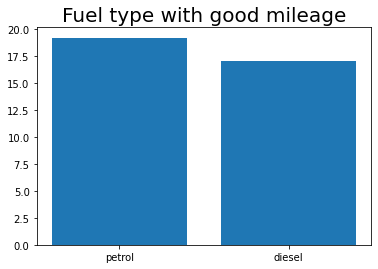

In [101]:
plt.bar(fuel,avg_mileage)
plt.title('Fuel type with good mileage',fontsize=20)
plt.show()